In [4]:
import pandas as pd
import numpy as np
from scipy.stats import norm as nm
from scipy.stats import ttest_rel
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
my_data = yf.download("TSLA", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
my_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,142.251999,148.738007,137.334000,148.723999,148.723999,100975000
2020-03-03,161.000000,161.395996,143.222000,149.102005,149.102005,128920000
2020-03-04,152.792007,153.304001,144.945999,149.899994,149.899994,75245000
2020-03-05,144.753998,149.149994,143.613998,144.908005,144.908005,54263500
2020-03-06,138.000000,141.399994,136.854004,140.695999,140.695999,63314500
2020-03-09,121.078003,132.600006,121.000000,121.599998,121.599998,85368500
2020-03-10,131.886002,133.600006,121.599998,129.065994,129.065994,77972000
2020-03-11,128.039993,130.716003,122.599998,126.846001,126.846001,66612500
2020-03-12,116.178001,118.900002,109.250000,112.110001,112.110001,94545500


In [7]:
my_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,393.616838,403.573339,382.713681,394.248892,394.248892,6.327665e+07
std,235.118779,239.504166,230.035067,235.650582,235.650582,3.331897e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,171.319000,175.634003,166.981003,169.938004,169.938004,3.758630e+07
50%,381.940002,404.398010,371.411987,387.790009,387.790009,5.774750e+07
75%,545.230011,565.764984,533.705017,561.489990,561.489990,8.248525e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


In [8]:
my_data.shape

(251, 6)

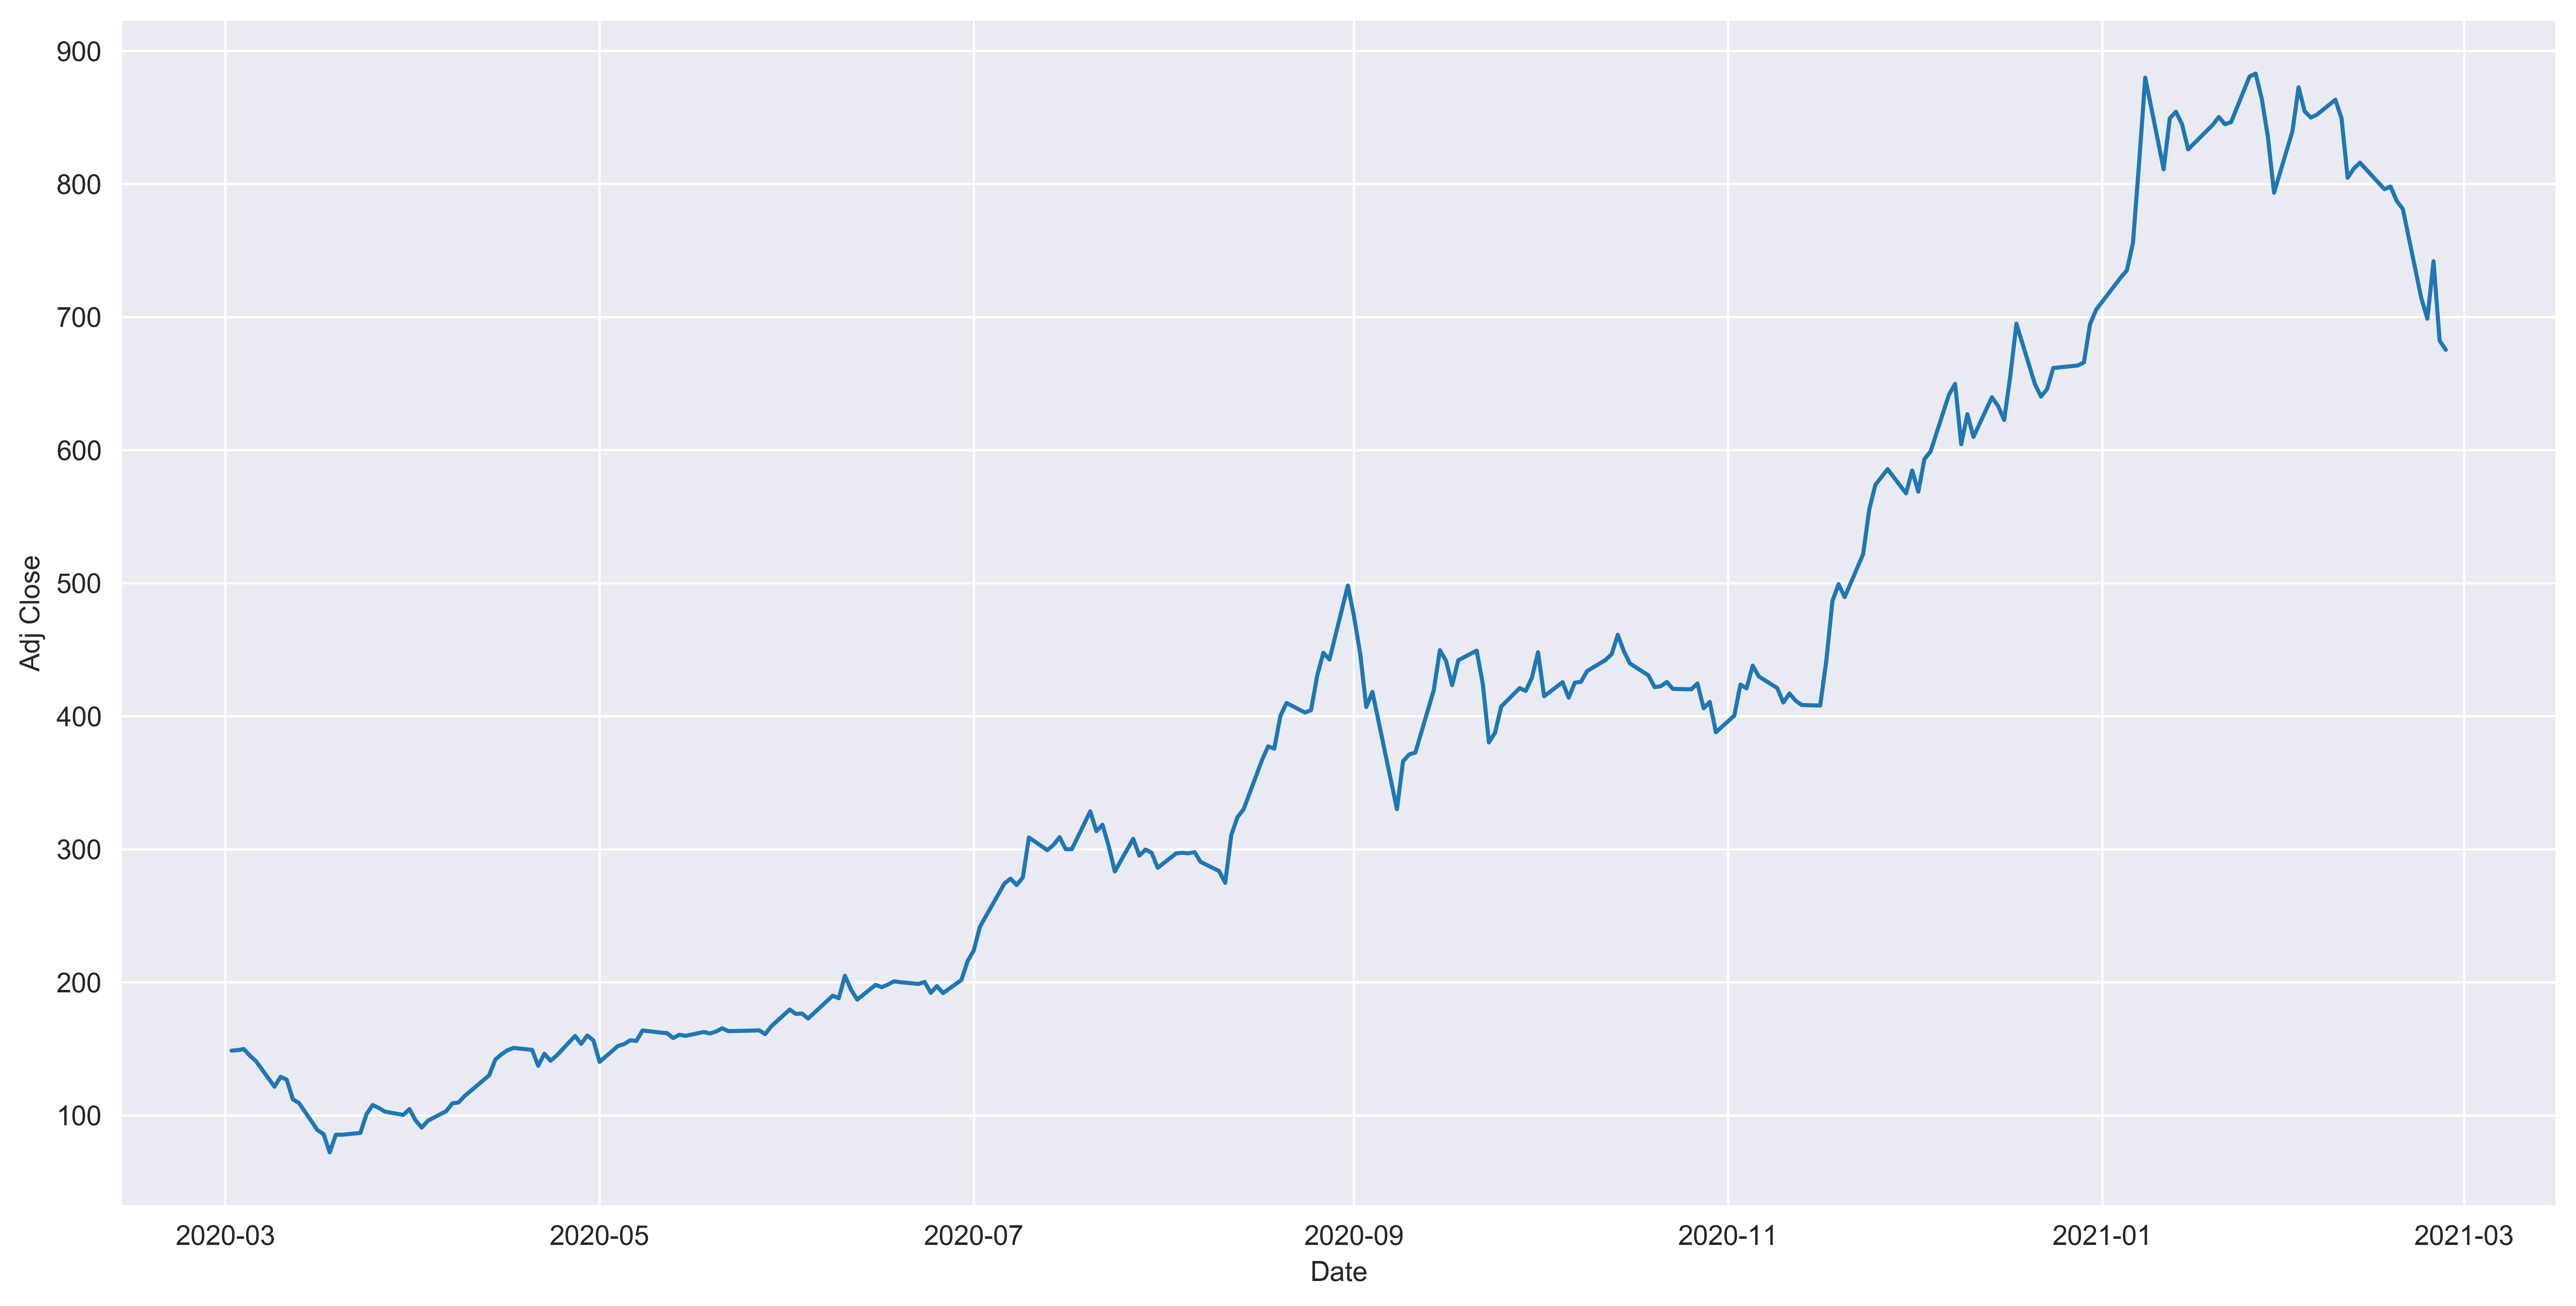

In [9]:
plt.figure(figsize=[16, 8], facecolor="w", dpi=550)
sns.set_style(style="darkgrid")
sns.lineplot(my_data.index, my_data["Adj Close"])

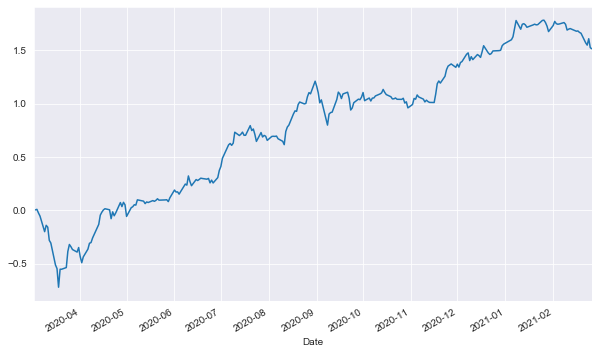

In [10]:
returns = np.log(my_data['Adj Close'] / my_data['Adj Close'].shift(1))
returns.cumsum().plot(figsize=(10, 6))

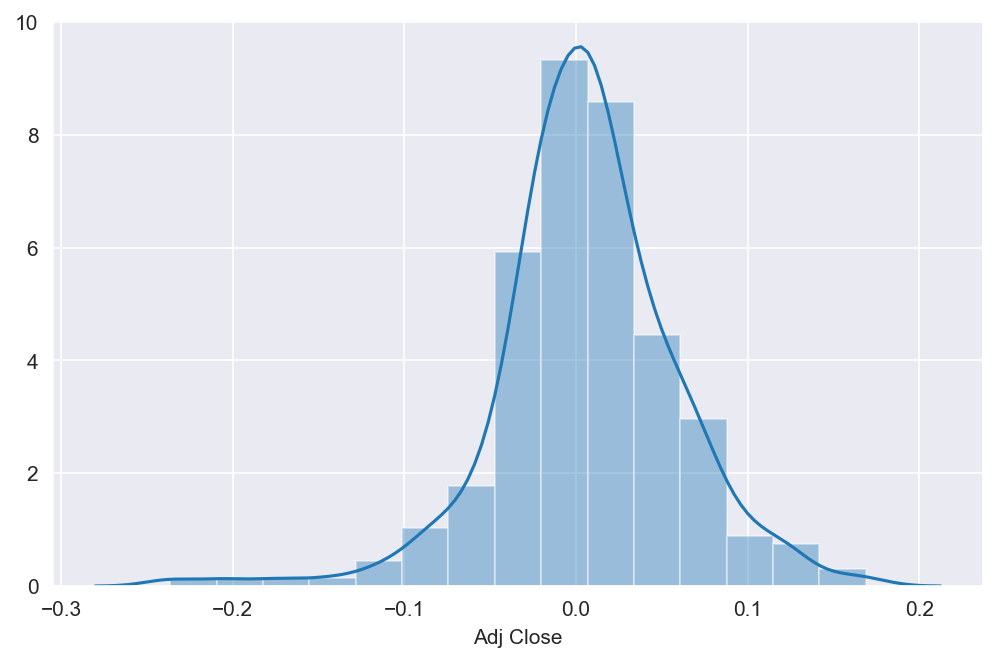

In [11]:
plt.figure(figsize=[8, 5], dpi=150, facecolor="w",)
sns.distplot(returns, bins=15,)

In [12]:
new_data = my_data[["Close"]]
new_data["Daily % Change"] = round(my_data['Adj Close'].pct_change() * 100, 4)
new_data.head(15)

,Close,Daily % Change
Date,,
2020-03-02,148.723999,NaN
2020-03-03,149.102005,0.2542
2020-03-04,149.899994,0.5352
2020-03-05,144.908005,-3.3302
2020-03-06,140.695999,-2.9067
2020-03-09,121.599998,-13.5725
2020-03-10,129.065994,6.1398
2020-03-11,126.846001,-1.7200
2020-03-12,112.110001,-11.6172


### 12 Months Volatility
The historical volatility of Tesla Inc.

In [13]:
annual_volatility = round(np.std(returns) * np.sqrt(252), 4)
print(f'The annualised volatility is {round(annual_volatility*100,2)} %')

The annualised volatility is 83.78 %


### 6 Months Volatility

In [14]:
### annualized volatility for 6 Months

six_months = my_data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)
print(f"The six months annualized volatility is {round(six_months, 2)*100} %")

The six months annualized volatility is 92.0 %


In [15]:
VIX = yf.download("^VIX", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [16]:
VIX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,38.540001,40.410000,31.500000,33.419998,33.419998,0
2020-03-03,33.650002,41.060001,24.930000,36.820000,36.820000,0
2020-03-04,34.439999,35.580002,30.299999,31.990000,31.990000,0
2020-03-05,33.610001,42.840000,33.540001,39.619999,39.619999,0
2020-03-06,48.930000,54.389999,40.840000,41.939999,41.939999,0


In [17]:
## Market Volatility
VIX['Adj Close'][-1]

27.950000762939453

In [18]:
print(f'The market volatility is {round(VIX["Adj Close"][-1], 2)} %.')

The market volatility is 27.95 %.


## Black-Schole Models

In [19]:
class BSM():
    
    def __init__(self, S, E, t, r, vol):
        self.spot = S
        self.Exercise = E
        self.time = t
        self.rate = r
        self.vol = vol
        self.d1 = (np.log(self.spot/self.Exercise) + (self.rate + 0.5 * self.vol ** 2) * self.time) / (self.vol * np.sqrt(self.time))
        self.d2 = self.d1 - (self.vol * np.sqrt(self.time))  
        
        
    
    def put(self):
        return np.exp(-self.rate*self.time) * (1 - nm.cdf(self.d2))
    
    def theta(self):        
        lab = self.rate * np.exp(-self.rate * self.time) * (1 - nm.cdf(self.d2))
        rob = np.exp(-self.rate * self.time) * nm.pdf(self.d2) * ((self.d1/(2 * self.time))-((self.rate)/(self.vol * np.sqrt(self.time))))
        return np.round(lab - rob, 4)
    
    
    def rho(self):
        e = -self.time * np.exp(-self.rate * self.time) * (1 - nm.cdf(self.d2))
        w = (np.sqrt(self.time)/self.vol) * np.exp(-self.rate * self.time) * nm.pdf(self.d2)
        return np.round(e-w, 4)
        
    
    def delta(self):
        return np.round(-(np.exp(-self.rate * self.time) * nm.pdf(self.d2))/(self.vol * self.spot * np.sqrt(self.time)), 4)
        
    def gamma(self):
        gamma = (np.exp(-self.rate * self.time) * self.d1 * nm.pdf(self.d2))/((self.vol ** 2) * (self.spot ** 2) * (np.sqrt(self.time)))
        return np.round(gamma, 4)
    
    
    def vega(self):
        vega = (np.exp(-self.rate * self.time) * nm.pdf(self.d2)) * (self.d1/self.vol)
        return np.round(vega, 4)
    
    def speed(self):
        rot = np.exp(-self.rate*self.time)*nm.pdf(self.d2)/((self.vol**2) * (self.spot**3)*np.sqrt(self.time))
        rap = -2*self.d1 + ((1 - self.d1*self.d2)/(self.vol*np.sqrt(self.time))) 
        return round((rot * rap), 4)

## Monte-Carlo Simulation

In [20]:
class MonteCarloSimulation():
    
    def __init__(self, price, strike_price, rate, time, vol, random_state=None):
        self.price = price
        self.strike_price = strike_price
        self.rate = rate
        self.time = time
        self.vol = vol
        self.random_state = random_state
        
    def put(self, num_iteration=1000):
        M = int(self.time * 360)        # M time interval 
        I = num_iteration
        dt = self.time / M 
        S = np.zeros((M + 1, I))
        S[0] = self.price
        if self.random_state is not None:
            np.random.seed(1234)
            rn = np.random.standard_normal(S.shape)
        else:
            rn = np.random.standard_normal(S.shape)
        for t in range(1, M + 1): 
            S[t] = S[t-1] * np.exp((self.rate - self.vol ** 2 / 2) * dt + self.vol * np.sqrt(dt) * rn[t]) 
        S = np.transpose(S)
    
        return round(np.exp(-self.rate*self.time)*np.mean(np.heaviside(self.strike_price - S[:,-1], 0)), 4)

## Medels

In [28]:
my_data.loc["2020-10-20"]["Adj Close"]

421.94000244140625

In [29]:
stock_price = my_data.loc["2020-10-20"]["Adj Close"]
future_price = 420
risk_free_rate = .07
no_days = 60
sig = annual_volatility
time_to_expiry = no_days/360

In [31]:
model = BSM(S=stock_price, E=future_price, t=time_to_expiry, r=risk_free_rate, vol=sig)
model.put()

0.5427481394567961

## Greeks for Black Scholes Model

### Theta

In [32]:
model.theta()

-0.1385

In [33]:
Th = np.linspace(0.1,1,12)
Theta_Put = np.zeros((len(Th),1))
for i in range(len(Th)):
    Theta_Put[i] = BSM(S=100, E=100, t=Th[i], r=.05, vol=.27).theta()    

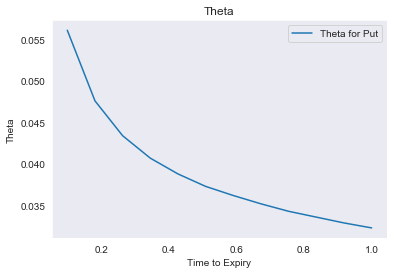

In [34]:
fig = plt.figure()
plt.plot(Th, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

### Rho

In [35]:
model.rho()

-0.2811

In [36]:
rho = np.linspace(0,0.1,11)
Rho = np.zeros((len(rho),1))
for i in range(len(rho)):
    Rho[i] = BSM(S=100, E=100, t=1, r=rho[i], vol=.27).rho()    

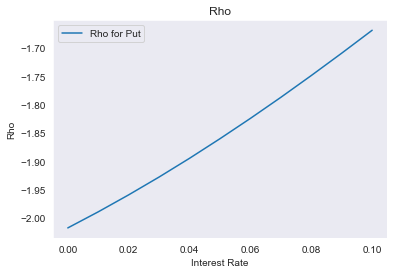

In [37]:
fig = plt.figure()
plt.plot(rho, Rho, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

### Delta

In [38]:
model.delta()

-0.0027

In [39]:
p = np.linspace(50,150,11)
delta = np.zeros((len(p),1))
for i in range(len(p)):
    delta[i] =  BSM(S=p[i], E=100, t=1, r=.05, vol=.27).delta()    

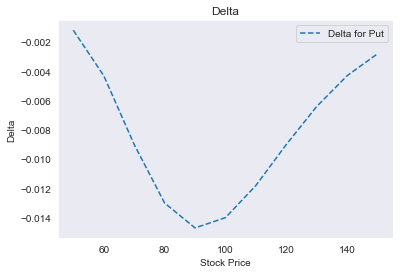

In [40]:
fig = plt.figure()
plt.plot(p, delta, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

### Gamma

In [41]:
model.gamma()

0.0

In [42]:
G = np.linspace(70,150,11)
Gamma = np.zeros((len(G), 1))
for i in range(len(G)):
    Gamma[i] = BSM(S=G[i], E=100, t=1, r=.05, vol=.27).gamma()    

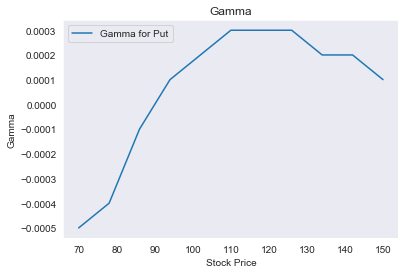

In [43]:
fig = plt.figure()
plt.plot(G, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

### Speed

In [44]:
model.speed()

0.0

In [45]:
s = np.linspace(70,150,11)
speed = np.zeros((len(G), 1))
for i in range(len(G)):
    speed[i] = BSM(S=s[i], E=100, t=1, r=.05, vol=.27).speed()    

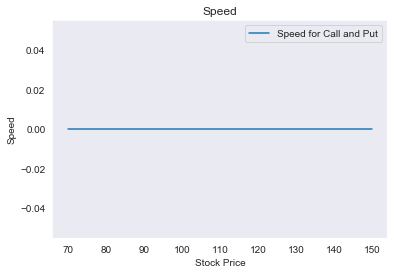

In [46]:
plt.figure()
plt.plot(s, speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

## Monte Carlo Simulation

In [37]:
model1 = MonteCarloSimulation(price=stock_price,strike_price=future_price,rate=risk_free_rate, time=time_to_expiry, vol=sig, random_state=42)
model1.put()

0.5327

## Model Comparison

The option price of the two models used will be compared using varying stock price keeping every other thing constant.

In [38]:
L = np.linspace(250,350, 100)
B = np.zeros((len(L),1))
M = np.zeros((len(L),1))

for i in range(len(L)):
    B[i] = BSM(S=L[i], E=300, t=1, r=0.03, vol=0.2).put()
    M[i] = MonteCarloSimulation(price=L[i],strike_price=300,rate=0.03, time=1, vol=0.2, random_state=42).put()
    

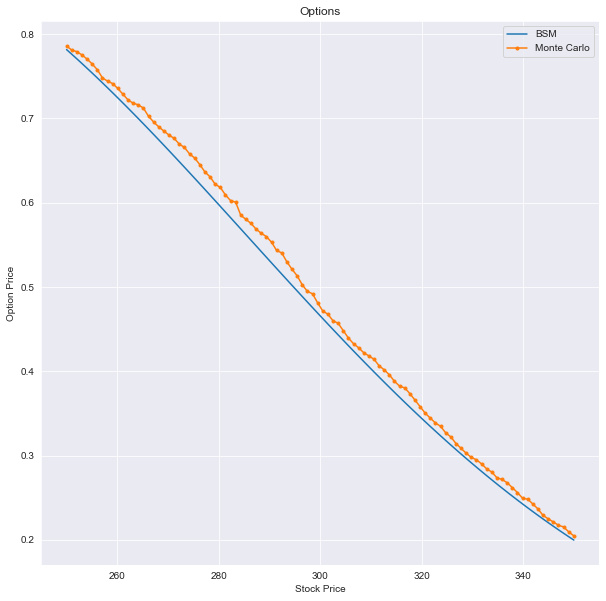

In [39]:
fig = plt.figure(figsize=[10, 10])

#plot the option prices from each model against stock prices
plt.grid(b=True)
plt.plot(L, B, '-')
plt.plot(L, M, '.-')


plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Options')
plt.legend(['BSM', "Monte Carlo"])

## Comparing the two models
This cell is comparing the option prices gotten from the two models with varying stock price

In [40]:
t = ttest_rel(B, M)

In [41]:
ob = {"df":9, "P-value":t.pvalue, "t_cal":t.statistic}

In [42]:
ttest = pd.DataFrame(data=ob)
ttest["mean of difference"] = np.mean(np.abs(B - M))
ttest.round(4).head()

,df,P-value,t_cal,mean of difference
0,9,0.0,-23.0272,0.0132


In [43]:
Lin = np.linspace(.250, .70, 100)
BSS = np.zeros((len(L),1))
MCC = np.zeros((len(L),1))

for i in range(len(L)):
    BSS[i] = BSM(S=300, E=300, t=Lin[i], r=0.03, vol=0.2).put()
    MCC[i] = MonteCarloSimulation(price=300,strike_price=300,rate=0.03, time=Lin[i], vol=0.2, random_state=42).put()
    

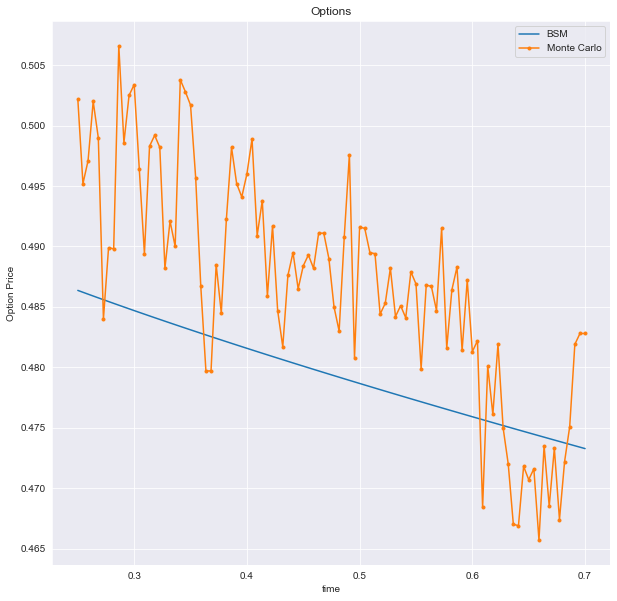

In [44]:
fig = plt.figure(figsize=[10, 10])

#plot the option prices from each model against stock prices
plt.grid(b=True)
plt.plot(Lin, BSS, '-')
plt.plot(Lin, MCC, '.-')


plt.xlabel('time')
plt.ylabel('Option Price')
plt.title('Options')
plt.legend(['BSM', "Monte Carlo"])